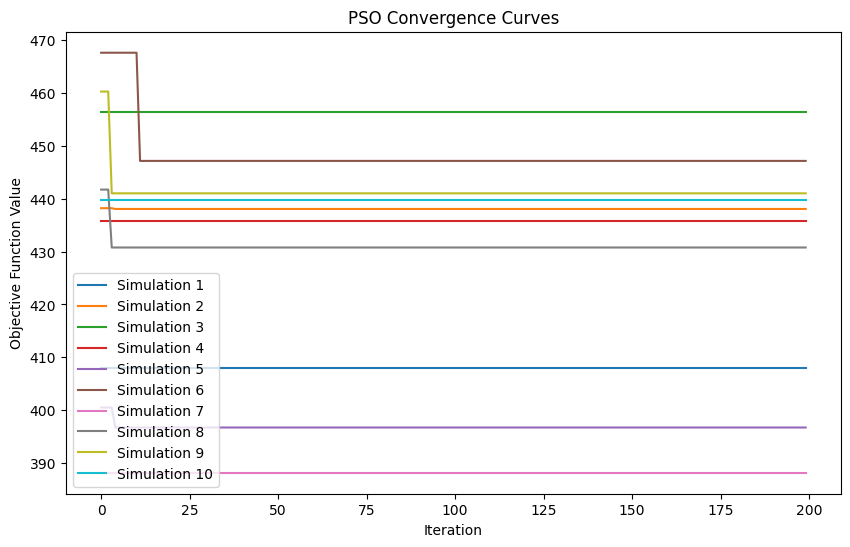

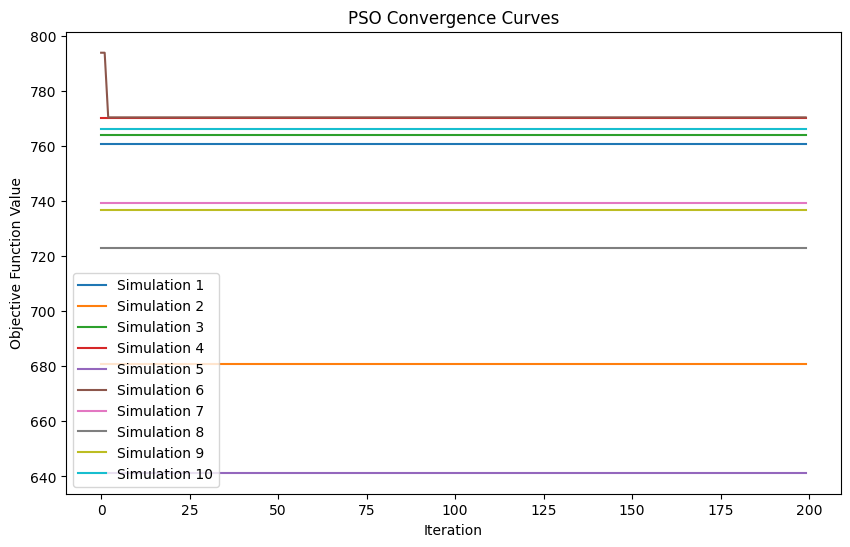

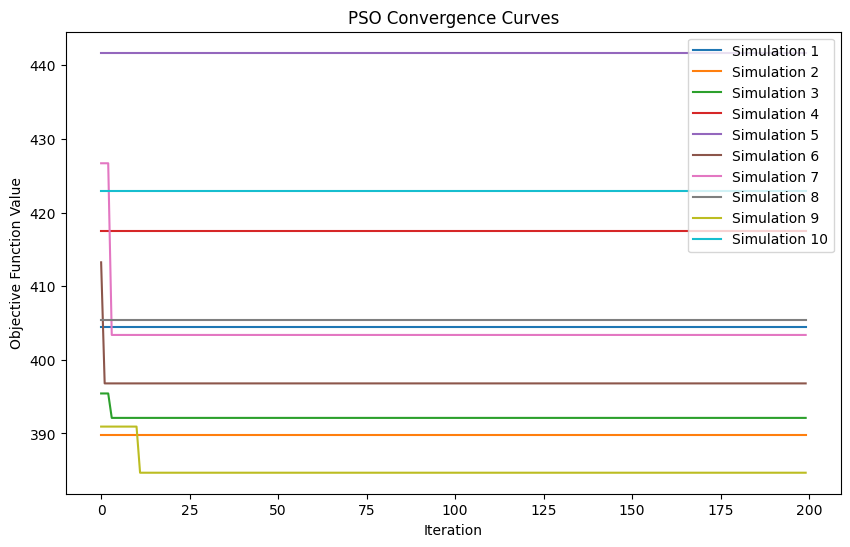

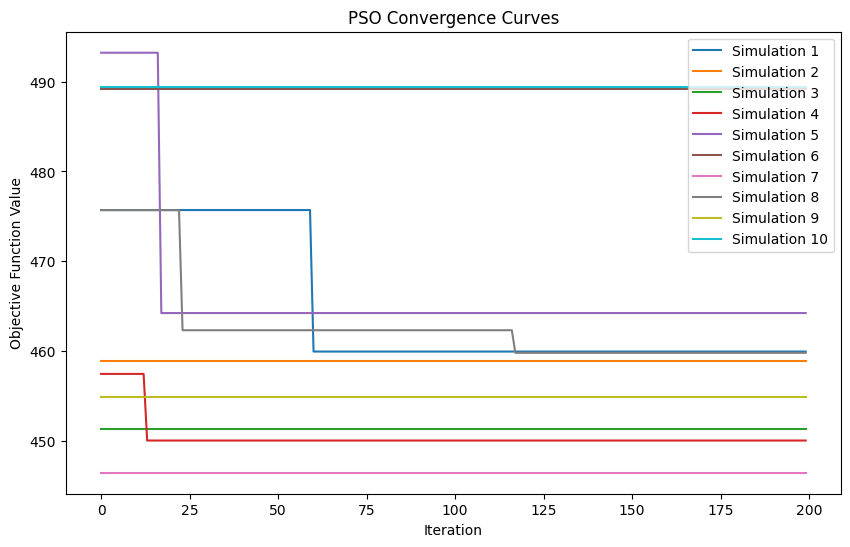

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function to be minimized (Rosenbrock function in this case)
def objective_function(x):
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10)

# Ensure particle positions are within the specified bounds
def constrain_position(x):
    return np.clip(x, -5.12, 5.12)

# Particle Swarm Optimization algorithm
def particle_swarm_optimization(dim, swarm_size, max_iterations, w, c1, c2):
    # Initialize particle positions randomly
    particles_position = np.random.uniform(-5.12, 5.12, size=(swarm_size, dim))
    particles_velocity = np.zeros((swarm_size, dim))
    personal_best_position = particles_position.copy()
    personal_best_value = np.array([objective_function(p) for p in particles_position])
    global_best_index = np.argmin(personal_best_value)
    global_best_position = personal_best_position[global_best_index, :]

    # PSO loop
    convergence_curve = np.zeros(max_iterations)
    for iteration in range(max_iterations):
        r1, r2 = np.random.rand(swarm_size, dim), np.random.rand(swarm_size, dim)
        
        # Update particle velocities
        particles_velocity = w * particles_velocity + c1 * r1 * (personal_best_position - particles_position) + c2 * r2 * (global_best_position - particles_position)
        
        # Update particle positions
        particles_position += particles_velocity
        particles_position = constrain_position(particles_position)

        # Update personal best
        current_value = np.array([objective_function(p) for p in particles_position])
        update_personal_best = current_value < personal_best_value
        personal_best_value[update_personal_best] = current_value[update_personal_best]
        personal_best_position[update_personal_best] = particles_position[update_personal_best]

        # Update global best
        global_best_index = np.argmin(personal_best_value)
        global_best_position = personal_best_position[global_best_index, :]

        # Save convergence data
        convergence_curve[iteration] = objective_function(global_best_position)

    return convergence_curve

# Function to run multiple simulations and plot convergence curves
def run_simulations(dim, swarm_size, max_iterations, w, c1, c2, num_simulations):
    convergence_curves = np.zeros((num_simulations, max_iterations))

    for i in range(num_simulations):
        convergence_curves[i, :] = particle_swarm_optimization(dim, swarm_size, max_iterations, w, c1, c2)

    # Plot convergence curves
    plt.figure(figsize=(10, 6))
    for i in range(num_simulations):
        plt.plot(convergence_curves[i, :], label=f'Simulation {i+1}')

    plt.title('PSO Convergence Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.legend()
    plt.show()

# Run simulations with different parameters
run_simulations(dim=30, swarm_size=50, max_iterations=200, w=1, c1=1.5, c2=2.5, num_simulations=10)

run_simulations(dim=50, swarm_size=50, max_iterations=200, w=1, c1=1.5, c2=2.5, num_simulations=10)

run_simulations(dim=30, swarm_size=50, max_iterations=200, w=1, c1=2, c2=2, num_simulations=10)

run_simulations(dim=30, swarm_size=10, max_iterations=200, w=1, c1=1.5, c2=2.5, num_simulations=10)